# __Importing Pandas/Numpy/Zipfile and Opening CSV files__

In [141]:
# importing pandas, numpy and zipfile
import zipfile
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import json

In [142]:
ls

README.md                data.sqlite              student.ipynb
Untitled.ipynb           stephanie_ciaccia.ipynb  zippedData/


In [143]:
## opening read file
ratings = pd.read_csv('zippedData/tmdb.movies.csv.gz',compression='gzip')
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',compression='gzip')


# Data Source #1  TMDB movies

In [144]:
ratings.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [145]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [146]:
ratings.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [147]:
ratings.head(1)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


In [148]:
ratings.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [149]:
ratings.shape

(26517, 10)

In [150]:
# checking for null values
ratings.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [151]:
ratings.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

# _Cleaning Dataframe - TMDB_

In [152]:
##removing 'Unnamed: Column 0' as it is a repeat of the values in the index

ratings = ratings.drop(["Unnamed: 0"], axis = 1)


In [153]:
ratings = ratings.drop(columns='original_language')

In [154]:
ratings.dtypes

genre_ids          object
id                  int64
original_title     object
popularity        float64
release_date       object
title              object
vote_average      float64
vote_count          int64
dtype: object

In [155]:
ratings.head(5)

,genre_ids,id,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,Inception,27.920,2010-07-16,Inception,8.3,22186


In [156]:
##information about first and last movie entry in data

first_movie = min(ratings['release_date'])
last_movie = max(ratings['release_date'])

print(first_movie)
print(last_movie)

1930-04-29
2020-12-25


In [157]:
##genre_id key

Action          28
Adventure       12
Animation       16
Comedy          35
Crime           80
Documentary     99
Drama           18
Family          10751
Fantasy         14
History         36
Horror          27
Music           10402
Mystery         9648
Romance         10749
Science Fiction 878
TV Movie        10770
Thriller        53
War             10752
Western         37

SyntaxError: invalid syntax (<ipython-input-157-d88fbf866cff>, line 3)

In [158]:
## converting 'release_date' column type from integer to datetime

ratings['release_date'] = pd.to_datetime(ratings['release_date'])

In [159]:
ratings['release_date']

0       2010-11-19
1       2010-03-26
2       2010-05-07
3       1995-11-22
4       2010-07-16
           ...    
26512   2018-10-13
26513   2018-05-01
26514   2018-10-01
26515   2018-06-22
26516   2018-10-05
Name: release_date, Length: 26517, dtype: datetime64[ns]

## _Analyzing - TMDB_

In [160]:
top_20_movies = ratings.sort_values(by='popularity',ascending=False).head(20)
top_20_movies

,genre_ids,id,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,"[28, 878, 12]",118340,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,"[878, 28, 53]",335984,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,"[878, 28, 53]",335984,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,[12],338952,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,"[10751, 16, 35, 14, 12]",404368,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


# Data Source #2 - TN movies budget

# _Cleaning TV movies budget_

In [161]:
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [162]:
budget.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [163]:
budget.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [164]:
### changing type of release Date to datetime

budget['release_date'] = pd.to_datetime(budget['release_date'])

In [165]:
### removing $ and , from Production Budget and and changing type to integer

budget['production_budget'] = budget['production_budget'].str.replace('$', '')
budget['production_budget'] = budget['production_budget'].str.replace(',', '')
budget['production_budget'] = budget['production_budget'].astype(int)

In [166]:
### removing $ and , from Domestic Gross and and changing type to integer

budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '')
budget['domestic_gross'] = budget['domestic_gross'].astype(int)

In [167]:
### removing $ and , from Worldwide Gross and changing type to integer

budget['worldwide_gross'] = budget['worldwide_gross'].str.replace('$', '')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace(',', '')
budget['worldwide_gross'] = budget['worldwide_gross'].astype(int)

In [168]:
#sanity check w/ data types
budget.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object

In [169]:
#checking for null values
budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [170]:
budget = budget.rename(columns = {"movie":"title"})

In [171]:
budget.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [172]:
budget.head(5)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


# _Analyzing TV movies Budget_

In [173]:
oldest_movie = min(budget['release_date'])
newest_movie = max(budget['release_date'])

print(oldest_movie)
print(newest_movie)

1915-02-08 00:00:00
2020-12-31 00:00:00


In [174]:
movie_range = relativedelta(newest_movie, oldest_movie).years
movie_range

105

In [175]:
top_20_movies = budget.sort_values(by='worldwide_gross',ascending=False).head(20)
top_20_movies


,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
42,43,1997-12-19,Titanic,200000000,659363944,2208208395
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157


In [176]:
top_20_movies = budget.sort_values(by="worldwide_gross",ascending=False).head(25)
top_20_movies

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
42,43,1997-12-19,Titanic,200000000,659363944,2208208395
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157


# Dataset #3 from TMBD API - THE MOVIE DB TOP RATED TV 

In [177]:
import requests

In [178]:
tv_api = requests.get('https://api.themoviedb.org/3/tv/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=1'
)
print(tv_api.status_code)

200


In [179]:
tv_api.json().keys()

top_rated = tv_api.json()['results']

top_rated = pd.DataFrame(top_rated)
len(top_rated)

20

In [180]:
tv_api.json().keys()

dict_keys(['page', 'results', 'total_pages', 'total_results'])

In [181]:
## PAGE 2
#requesting API
tv_api_2 = requests.get('https://api.themoviedb.org/3/tv/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=2'
)

#pulling requests
top_rated_2 = tv_api_2.json()['results']


#making Dataframe
top_rated_2 = pd.DataFrame(top_rated_2)

###Page 3

#requesting API
tv_api_3 = requests.get('https://api.themoviedb.org/3/tv/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=3'
)

#pulling requests
top_rated_3 = tv_api_3.json()['results']


#making Dataframe
top_rated_3= pd.DataFrame(top_rated_3)

###Page 4

#requesting API
tv_api_4 = requests.get('https://api.themoviedb.org/3/tv/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=4'
)

#pulling requests
top_rated_4 = tv_api_4.json()['results']


#making Dataframe
top_rated_4 = pd.DataFrame(top_rated_4)

###Page 5

#requesting API
tv_api_5 = requests.get('https://api.themoviedb.org/3/tv/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=5'
)

#pulling requests
top_rated_5 = tv_api_5.json()['results']


#making Dataframe
top_rated_5 = pd.DataFrame(top_rated_5)


In [183]:
###Page 6

#requesting API
tv_api_6 = requests.get('https://api.themoviedb.org/3/tv/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=6'
)

#pulling requests
top_rated_6 = tv_api_6.json()['results']


#making Dataframe
top_rated_6 = pd.DataFrame(top_rated_6)

###Page 7

#requesting API
tv_api_7 = requests.get('https://api.themoviedb.org/3/tv/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=7'
)

#pulling requests
top_rated_7 = tv_api_7.json()['results']


#making Dataframe
top_rated_7 = pd.DataFrame(top_rated_7)

###Page 8

#requesting API
tv_api_8 = requests.get('https://api.themoviedb.org/3/tv/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=8'
)

#pulling requests
top_rated_8 = tv_api_8.json()['results']


#making Dataframe
top_rated_8 = pd.DataFrame(top_rated_8)

###Page 9

#requesting API
tv_api_9 = requests.get('https://api.themoviedb.org/3/tv/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=9'
)

#pulling requests
top_rated_9 = tv_api_9.json()['results']


#making Dataframe
top_rated_9 = pd.DataFrame(top_rated_9)

###Page 10

#requesting API
tv_api_10 = requests.get('https://api.themoviedb.org/3/tv/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=10'
)

#pulling requests
top_rated_10 = tv_api_10.json()['results']


#making Dataframe
top_rated_10 = pd.DataFrame(top_rated_10)

In [184]:
top_rated_200 = pd.concat([top_rated, top_rated_2, top_rated_3, top_rated_4, top_rated_5, top_rated_6, top_rated_7, top_rated_8, top_rated_9, top_rated_10])

# _THE MOVIE DB TOP RATED TV - CLEANING_

In [185]:
top_rated_200.dtypes

backdrop_path         object
first_air_date        object
genre_ids             object
id                     int64
name                  object
origin_country        object
original_language     object
original_name         object
overview              object
popularity           float64
poster_path           object
vote_average         float64
vote_count             int64
dtype: object

In [186]:
#splitting the genres into multiple columns

# split the list into columns
split_rated = top_rated_200['genre_ids'].apply(pd.Series)

#renaming the columns
split_rated = split_rated.rename(columns=lambda x: f'col_{x+1}')

# add the new columns back to top_rated DataFrame
top_rated_200 = pd.concat([top_rated_200, split_rated], axis=1)



In [187]:
top_rated_200.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 19
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   backdrop_path      199 non-null    object 
 1   first_air_date     200 non-null    object 
 2   genre_ids          200 non-null    object 
 3   id                 200 non-null    int64  
 4   name               200 non-null    object 
 5   origin_country     200 non-null    object 
 6   original_language  200 non-null    object 
 7   original_name      200 non-null    object 
 8   overview           200 non-null    object 
 9   popularity         200 non-null    float64
 10  poster_path        200 non-null    object 
 11  vote_average       200 non-null    float64
 12  vote_count         200 non-null    int64  
 13  col_1              200 non-null    float64
 14  col_2              172 non-null    float64
 15  col_3              128 non-null    float64
 16  col_4              41 non-n

In [188]:
#dropping columns that aren't needed

top_rated_200 = top_rated_200.drop(['genre_ids', 'origin_country', 'original_language',
                                    'overview','backdrop_path', 'poster_path', 'col_6'], axis=1)

In [189]:
#renaming the genre columns
top_rated_200.rename(columns = {'col_1':'genre_id_1','col_2':'genre_id_2','col_3':'genre_id_3',
                            'col_4':'genre_id_4','col_5':'genre_id_5'}, inplace = True)

In [190]:
##changing N/A variables to 0
top_rated_200 = top_rated_200.fillna(0)

In [191]:
## converting  column type from float64 to int

top_rated_200[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5']] = top_rated_200[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5']].astype(int)

In [53]:
top_rated_200.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 19
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   first_air_date  200 non-null    object 
 1   id              200 non-null    int64  
 2   name            200 non-null    object 
 3   original_name   200 non-null    object 
 4   popularity      200 non-null    float64
 5   vote_average    200 non-null    float64
 6   vote_count      200 non-null    int64  
 7   genre_id_1      200 non-null    int64  
 8   genre_id_2      200 non-null    int64  
 9   genre_id_3      200 non-null    int64  
 10  genre_id_4      200 non-null    int64  
 11  genre_id_5      200 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 20.3+ KB


# _THE MOVIE DB TOP RATED TV - ANALYSIS_
   

In [54]:
##genres

TV SHOW
Action & Adventure    10759
Animation             16
Comedy                35
Crime                 80
Documentary           99
Drama                 18
Family                10751
Kids                  10762
Mystery               9648
News                  10763
Reality               10764
Sci-Fi & Fantasy      10765
Soap                  10766
Talk                  10767
War & Politics        10768
Western               37

SyntaxError: invalid syntax (<ipython-input-54-e4b66b4102a0>, line 3)

In [192]:
top_20_series = top_rated_200.sort_values(by='vote_average',ascending=False).head(20)
top_20_series

,first_air_date,id,name,original_name,popularity,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5
0,2021-09-03,130392,The D'Amelio Show,The D'Amelio Show,11.368,8.9,3183,10764,0,0,0,0
1,2008-01-20,1396,Breaking Bad,Breaking Bad,374.007,8.9,11236,18,0,0,0,0
2,2023-01-15,100088,The Last of Us,The Last of Us,6243.954,8.8,2334,18,0,0,0,0
12,2021-07-01,125910,Young Royals,Young Royals,38.453,8.7,852,18,0,0,0,0
4,2019-10-08,89456,Primal,Primal,41.959,8.7,1146,10759,16,18,0,0
5,2012-01-06,45950,High School DxD,ハイスクールD×D,133.198,8.7,1600,16,10759,35,10765,0
6,2023-01-20,217460,Shanty Town,Shanty Town,14.459,8.7,103,80,18,0,0,0
7,2014-04-06,60863,Haikyu!!,ハイキュー!!,68.223,8.7,1089,16,35,18,0,0
8,2011-10-02,46298,Hunter x Hunter,ハンターｘハンター,164.113,8.7,1335,10759,16,18,0,0
9,2022-11-03,213762,Be Eternal: Champions of America,Sean eternos: Campeones de América,18.466,8.7,107,99,0,0,0,0


In [193]:
oldest_episode = min(top_rated_200['first_air_date'])
newest_episode = max(top_rated_200['first_air_date'])

print(oldest_episode)
print(newest_episode)

1985-03-04
2023-01-20


# Dataset #4 from TMDB API - UPDATED Movie Ratings

#Pulling a new set of data from TMBD so we have updated movie list that is current. The set that we were given stops in 2020.

In [57]:
##Page 1
#requesting API

movie_api = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=1'
)

#pulling results key

top_movies = movie_api.json()['results']

##creating Dataframe

top_movies = pd.DataFrame(top_movies)


print(movie_api.status_code)

200


In [58]:
movie_api.json().keys()

dict_keys(['page', 'results', 'total_pages', 'total_results'])

In [59]:
## PAGE 2
#requesting API
movie_api_2 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=2'
)

#pulling requests
top_movies_2 = movie_api_2.json()['results']


#making Dataframe
top_movies_2 = pd.DataFrame(top_movies_2)

## PAGE 3
#requesting API
movie_api_3 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=3'
)

#pulling requests
top_movies_3 = movie_api_3.json()['results']


#making Dataframe
top_movies_3  = pd.DataFrame(top_movies_3)

## PAGE 4
#requesting API
movie_api_4 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=4'
)

#pulling requests
top_movies_4 = movie_api_4.json()['results']


#making Dataframe
top_movies_4 = pd.DataFrame(top_movies_4)

## PAGE 5
#requesting API
movie_api_5 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=5'
)

#pulling requests
top_movies_5 = movie_api_5.json()['results']


#making Dataframe
top_movies_5 = pd.DataFrame(top_movies_5)

## PAGE 6
#requesting API
movie_api_6 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=6'
)

#pulling requests
top_movies_6 = movie_api_6.json()['results']


#making Dataframe
top_movies_6 = pd.DataFrame(top_movies_6)

## PAGE 7
#requesting API
movie_api_7 = requests.get('https://api.themoviedb.org/3/tv/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=7'
)

#pulling requests
top_movies_7 = movie_api_7.json()['results']


#making Dataframe
top_movies_7 = pd.DataFrame(top_movies_7)

## PAGE 8
#requesting API
movie_api_8 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=8'
)

#pulling requests
top_movies_8 = movie_api_8.json()['results']


#making Dataframe
top_movies_8 = pd.DataFrame(top_movies_8)

## PAGE 9
#requesting API
movie_api_9 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=9'
)

#pulling requests
top_movies_9 = movie_api_9.json()['results']


#making Dataframe
top_movies_9 = pd.DataFrame(top_movies_9)

## PAGE 10
#requesting API
movie_api_10 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=10'
)

#pulling requests
top_movies_10 = movie_api_10.json()['results']


#making Dataframe
top_movies_10 = pd.DataFrame(top_movies_10)


In [60]:
## PAGE 11
#requesting API
movie_api_11 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=11'
)

#pulling requests
top_movies_11 = movie_api_11.json()['results']


#making Dataframe
top_movies_11 = pd.DataFrame(top_movies_11)

## PAGE 12
#requesting API
movie_api_12 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=12'
)

#pulling requests
top_movies_12 = movie_api_12.json()['results']


#making Dataframe
top_movies_12  = pd.DataFrame(top_movies_12)

## PAGE 13
#requesting API
movie_api_13 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=13'
)

#pulling requests
top_movies_13 = movie_api_13.json()['results']


#making Dataframe
top_movies_13 = pd.DataFrame(top_movies_13)

## PAGE 14
#requesting API
movie_api_14 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=14'
)

#pulling requests
top_movies_14 = movie_api_14.json()['results']


#making Dataframe
top_movies_14 = pd.DataFrame(top_movies_14)

## PAGE 15
#requesting API
movie_api_15 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=15'
)

#pulling requests
top_movies_15 = movie_api_15.json()['results']


#making Dataframe
top_movies_15 = pd.DataFrame(top_movies_15)

## PAGE 16
#requesting API
movie_api_16 = requests.get('https://api.themoviedb.org/3/tv/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=16'
)

#pulling requests
top_movies_16 = movie_api_16.json()['results']


#making Dataframe
top_movies_16 = pd.DataFrame(top_movies_16)

## PAGE 17
#requesting API
movie_api_17 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=17'
)

#pulling requests
top_movies_17 = movie_api_17.json()['results']


#making Dataframe
top_movies_17 = pd.DataFrame(top_movies_17)

## PAGE 18
#requesting API
movie_api_18 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=18'
)

#pulling requests
top_movies_18 = movie_api_18.json()['results']


#making Dataframe
top_movies_18 = pd.DataFrame(top_movies_18)

## PAGE 19
#requesting API
movie_api_19 = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=19'
)

#pulling requests
top_movies_19 = movie_api_19.json()['results']


#making Dataframe
top_movies_19 = pd.DataFrame(top_movies_19)

In [61]:
top_movies_200 = pd.concat([top_movies, top_movies_2, top_movies_3, top_movies_4, top_movies_5,
                            top_movies_6, top_movies_7, top_movies_8, top_movies_9, top_movies_10,
                            top_movies_11, top_movies_12, top_movies_13, top_movies_14, top_movies_15,
                            top_movies_16, top_movies_17, top_movies_18, top_movies_19])

In [62]:
top_movies_200.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 19
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              340 non-null    object 
 1   backdrop_path      377 non-null    object 
 2   genre_ids          380 non-null    object 
 3   id                 380 non-null    int64  
 4   original_language  380 non-null    object 
 5   original_title     340 non-null    object 
 6   overview           380 non-null    object 
 7   popularity         380 non-null    float64
 8   poster_path        380 non-null    object 
 9   release_date       340 non-null    object 
 10  title              340 non-null    object 
 11  video              340 non-null    object 
 12  vote_average       380 non-null    float64
 13  vote_count         380 non-null    int64  
 14  first_air_date     40 non-null     object 
 15  name               40 non-null     object 
 16  origin_country     40 non-n

# _CLEANING_

In [63]:
#splitting the genres into multiple columns

# split the list into columns
split_movies = top_movies_200['genre_ids'].apply(pd.Series)

#renaming the columns
split_movies = split_movies.rename(columns=lambda x: f'col_{x+1}')

# add the new columns back to top_rated DataFrame
top_movies_200 = pd.concat([top_movies_200, split_movies], axis=1)


In [64]:
##dropping null values
top_movies_200.dropna(axis=0, how='any', subset=['title'], inplace=True)


In [65]:
#dropping columns that aren't needed

top_movies_200 = top_movies_200.drop(['adult', 'backdrop_path', 'genre_ids', 'poster_path', 'video', 'original_name',
                                      'origin_country', 'original_language', 'overview', 'col_5', 'col_6',
                                      'col_7', 'col_8', 'col_9','first_air_date', 'name'], axis=1)

In [66]:
#renaming the genre columns
top_movies_200.rename(columns = {'col_1':'genre_id_1','col_2':'genre_id_2','col_3':'genre_id_3',
                            'col_4':'genre_id_4'}, inplace = True)

In [67]:
top_movies_200.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 19
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              340 non-null    int64  
 1   original_title  340 non-null    object 
 2   popularity      340 non-null    float64
 3   release_date    340 non-null    object 
 4   title           340 non-null    object 
 5   vote_average    340 non-null    float64
 6   vote_count      340 non-null    int64  
 7   genre_id_1      340 non-null    float64
 8   genre_id_2      278 non-null    float64
 9   genre_id_3      161 non-null    float64
 10  genre_id_4      55 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 31.9+ KB


In [68]:
top_movies_200.head()

,id,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4
0,238,The Godfather,101.679,1972-03-14,The Godfather,8.7,17564,18.0,80.0,NaN,NaN
1,278,The Shawshank Redemption,84.925,1994-09-23,The Shawshank Redemption,8.7,23400,18.0,80.0,NaN,NaN
2,772071,Cuando Sea Joven,47.213,2022-09-14,Cuando Sea Joven,8.7,209,35.0,14.0,NaN,NaN
3,995133,"The Boy, the Mole, the Fox and the Horse",28.940,2022-12-25,"The Boy, the Mole, the Fox and the Horse",8.6,249,16.0,10751.0,12.0,14.0
4,240,The Godfather Part II,59.963,1974-12-20,The Godfather Part II,8.6,10635,18.0,80.0,NaN,NaN


In [69]:
##changing N/A variables to 0
top_movies_200 = top_movies_200.fillna(0)

In [70]:
## converting  column type from float64 to int

top_movies_200[['genre_id_1','genre_id_2','genre_id_3','genre_id_4']] = top_movies_200[['genre_id_1','genre_id_2','genre_id_3','genre_id_4']].astype(int)

# Analyzing Movie Data

In [71]:
top_20_movies_2023 = top_movies_200.sort_values(by='vote_count',ascending=False).head(20)
top_20_movies_2023

,id,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4
11,27205,Inception,94.787,2010-07-15,Inception,8.4,33285,28,878,12,0
2,157336,Interstellar,177.774,2014-11-05,Interstellar,8.4,30724,12,18,878,0
11,155,The Dark Knight,81.349,2008-07-14,The Dark Knight,8.5,29299,18,28,80,53
18,299536,Avengers: Infinity War,309.280,2018-04-25,Avengers: Infinity War,8.3,26445,12,28,878,0
8,550,Fight Club,77.840,1999-10-15,Fight Club,8.4,25961,18,53,35,0
13,680,Pulp Fiction,60.614,1994-09-10,Pulp Fiction,8.5,24778,53,80,0,0
15,13,Forrest Gump,69.614,1994-06-23,Forrest Gump,8.5,24274,35,18,10749,0
8,68718,Django Unchained,62.758,2012-12-25,Django Unchained,8.2,23762,18,37,0,0
1,278,The Shawshank Redemption,84.925,1994-09-23,The Shawshank Redemption,8.7,23400,18,80,0,0
14,299534,Avengers: Endgame,185.565,2019-04-24,Avengers: Endgame,8.3,22760,12,878,28,0


In [72]:
top_movies_200.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 19
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              340 non-null    int64  
 1   original_title  340 non-null    object 
 2   popularity      340 non-null    float64
 3   release_date    340 non-null    object 
 4   title           340 non-null    object 
 5   vote_average    340 non-null    float64
 6   vote_count      340 non-null    int64  
 7   genre_id_1      340 non-null    int64  
 8   genre_id_2      340 non-null    int64  
 9   genre_id_3      340 non-null    int64  
 10  genre_id_4      340 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 31.9+ KB


In [73]:
#reindexing dataframe
top_movies_200 = top_movies_200.reset_index(drop=True)

In [74]:
top_movies_200.head(40)

,id,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4
0,238,The Godfather,101.679,1972-03-14,The Godfather,8.7,17564,18,80,0,0
1,278,The Shawshank Redemption,84.925,1994-09-23,The Shawshank Redemption,8.7,23400,18,80,0,0
2,772071,Cuando Sea Joven,47.213,2022-09-14,Cuando Sea Joven,8.7,209,35,14,0,0
3,995133,"The Boy, the Mole, the Fox and the Horse",28.940,2022-12-25,"The Boy, the Mole, the Fox and the Horse",8.6,249,16,10751,12,14
4,240,The Godfather Part II,59.963,1974-12-20,The Godfather Part II,8.6,10635,18,80,0,0
5,424,Schindler's List,59.117,1993-12-15,Schindler's List,8.6,13835,18,36,10752,0
6,19404,दिलवाले दुल्हनिया ले जायेंगे,26.682,1995-10-19,Dilwale Dulhania Le Jayenge,8.6,4072,35,18,10749,0
7,129,千と千尋の神隠し,76.375,2002-09-20,Spirited Away,8.5,14022,16,10751,14,0
8,389,12 Angry Men,37.505,1957-04-10,12 Angry Men,8.5,7094,18,0,0,0
9,372058,君の名は。,86.470,2016-08-26,Your Name.,8.5,9577,10749,16,18,0


# JOINING MOVIES AND BUDGETS TABLES

In [75]:
budget_movie = pd.merge(top_movies_200, budget, on='title', how='left')
display(budget_movie)

,id_x,original_title,popularity,release_date_x,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,238,The Godfather,101.679,1972-03-14,The Godfather,8.7,17564,18,80,0,0,87.0,1972-03-15,7000000.0,134966411.0,268500000.0
1,278,The Shawshank Redemption,84.925,1994-09-23,The Shawshank Redemption,8.7,23400,18,80,0,0,37.0,1994-09-23,25000000.0,28241469.0,28307092.0
2,772071,Cuando Sea Joven,47.213,2022-09-14,Cuando Sea Joven,8.7,209,35,14,0,0,NaN,NaT,NaN,NaN,NaN
3,995133,"The Boy, the Mole, the Fox and the Horse",28.940,2022-12-25,"The Boy, the Mole, the Fox and the Horse",8.6,249,16,10751,12,14,NaN,NaT,NaN,NaN,NaN
4,240,The Godfather Part II,59.963,1974-12-20,The Godfather Part II,8.6,10635,18,80,0,0,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,15383,L'Armée des ombres,17.461,1969-09-10,Army of Shadows,8.0,524,10752,18,53,0,NaN,NaT,NaN,NaN,NaN
336,10515,天空の城ラピュタ,43.910,1986-08-02,Castle in the Sky,8.0,3480,12,14,16,28,NaN,NaT,NaN,NaN,NaN
337,698948,Thirteen Lives,47.566,2022-07-18,Thirteen Lives,8.0,920,18,53,28,12,NaN,NaT,NaN,NaN,NaN
338,698508,Redeeming Love,49.975,2022-01-21,Redeeming Love,8.0,229,10749,18,36,0,NaN,NaT,NaN,NaN,NaN


In [76]:
display(budget_movie)

,id_x,original_title,popularity,release_date_x,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,238,The Godfather,101.679,1972-03-14,The Godfather,8.7,17564,18,80,0,0,87.0,1972-03-15,7000000.0,134966411.0,268500000.0
1,278,The Shawshank Redemption,84.925,1994-09-23,The Shawshank Redemption,8.7,23400,18,80,0,0,37.0,1994-09-23,25000000.0,28241469.0,28307092.0
2,772071,Cuando Sea Joven,47.213,2022-09-14,Cuando Sea Joven,8.7,209,35,14,0,0,NaN,NaT,NaN,NaN,NaN
3,995133,"The Boy, the Mole, the Fox and the Horse",28.940,2022-12-25,"The Boy, the Mole, the Fox and the Horse",8.6,249,16,10751,12,14,NaN,NaT,NaN,NaN,NaN
4,240,The Godfather Part II,59.963,1974-12-20,The Godfather Part II,8.6,10635,18,80,0,0,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,15383,L'Armée des ombres,17.461,1969-09-10,Army of Shadows,8.0,524,10752,18,53,0,NaN,NaT,NaN,NaN,NaN
336,10515,天空の城ラピュタ,43.910,1986-08-02,Castle in the Sky,8.0,3480,12,14,16,28,NaN,NaT,NaN,NaN,NaN
337,698948,Thirteen Lives,47.566,2022-07-18,Thirteen Lives,8.0,920,18,53,28,12,NaN,NaT,NaN,NaN,NaN
338,698508,Redeeming Love,49.975,2022-01-21,Redeeming Love,8.0,229,10749,18,36,0,NaN,NaT,NaN,NaN,NaN


In [77]:
budget_movie = budget_movie.drop(['id_y', 'release_date_y'], axis=1)

In [78]:
budget_movie = budget_movie.drop(['id_x'], axis=1)

In [79]:
budget_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 339
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     340 non-null    object 
 1   popularity         340 non-null    float64
 2   release_date_x     340 non-null    object 
 3   title              340 non-null    object 
 4   vote_average       340 non-null    float64
 5   vote_count         340 non-null    int64  
 6   genre_id_1         340 non-null    int64  
 7   genre_id_2         340 non-null    int64  
 8   genre_id_3         340 non-null    int64  
 9   genre_id_4         340 non-null    int64  
 10  production_budget  92 non-null     float64
 11  domestic_gross     92 non-null     float64
 12  worldwide_gross    92 non-null     float64
dtypes: float64(5), int64(5), object(3)
memory usage: 37.2+ KB


In [80]:
all_time_top = budget_movie.sort_values(by='popularity',ascending=False).head(20)
all_time_top

,original_title,popularity,release_date_x,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,production_budget,domestic_gross,worldwide_gross
34,Puss in Boots: The Last Wish,2589.341,2022-12-07,Puss in Boots: The Last Wish,8.4,4309,16,12,35,10751,NaN,NaN,NaN
81,Guillermo del Toro's Pinocchio,407.115,2022-11-09,Guillermo del Toro's Pinocchio,8.3,1976,16,14,18,10402,NaN,NaN,NaN
86,劇場版「鬼滅の刃」無限列車編,384.471,2020-10-16,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,8.3,2970,16,28,12,14,NaN,NaN,NaN
73,Top Gun: Maverick,372.213,2022-05-24,Top Gun: Maverick,8.3,6244,28,18,0,0,NaN,NaN,NaN
322,Huevitos Congelados,368.120,2022-12-14,A Frozen Rooster,8.0,241,16,12,35,10751,NaN,NaN,NaN
98,Avengers: Infinity War,309.280,2018-04-25,Avengers: Infinity War,8.3,26445,12,28,878,0,300000000.0,678815482.0,2.048134e+09
298,Everything Everywhere All at Once,274.933,2022-03-24,Everything Everywhere All at Once,8.0,3408,28,12,878,0,NaN,NaN,NaN
125,Hacksaw Ridge,257.788,2016-10-07,Hacksaw Ridge,8.2,11993,18,36,10752,0,40000000.0,67209615.0,1.689047e+08
330,Sing 2,213.654,2021-12-01,Sing 2,8.0,3541,16,12,35,10751,NaN,NaN,NaN
233,Emancipation,204.921,2022-12-02,Emancipation,8.1,791,28,18,53,0,NaN,NaN,NaN


In [81]:
##changing N/A variables to 0
budget_movie = budget_movie.fillna(0)
budget_movie

,original_title,popularity,release_date_x,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,production_budget,domestic_gross,worldwide_gross
0,The Godfather,101.679,1972-03-14,The Godfather,8.7,17564,18,80,0,0,7000000.0,134966411.0,268500000.0
1,The Shawshank Redemption,84.925,1994-09-23,The Shawshank Redemption,8.7,23400,18,80,0,0,25000000.0,28241469.0,28307092.0
2,Cuando Sea Joven,47.213,2022-09-14,Cuando Sea Joven,8.7,209,35,14,0,0,0.0,0.0,0.0
3,"The Boy, the Mole, the Fox and the Horse",28.940,2022-12-25,"The Boy, the Mole, the Fox and the Horse",8.6,249,16,10751,12,14,0.0,0.0,0.0
4,The Godfather Part II,59.963,1974-12-20,The Godfather Part II,8.6,10635,18,80,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,L'Armée des ombres,17.461,1969-09-10,Army of Shadows,8.0,524,10752,18,53,0,0.0,0.0,0.0
336,天空の城ラピュタ,43.910,1986-08-02,Castle in the Sky,8.0,3480,12,14,16,28,0.0,0.0,0.0
337,Thirteen Lives,47.566,2022-07-18,Thirteen Lives,8.0,920,18,53,28,12,0.0,0.0,0.0
338,Redeeming Love,49.975,2022-01-21,Redeeming Love,8.0,229,10749,18,36,0,0.0,0.0,0.0


In [82]:
## converting  column type from float64 to int

budget_movie[['popularity', 'production_budget', 'domestic_gross', 'worldwide_gross']] = budget_movie[['popularity', 'production_budget', 'domestic_gross', 'worldwide_gross']].astype(int)

In [83]:
top_20_movies_2023 = budget_movie.sort_values(by='popularity',ascending=False).head(30)
top_20_movies_2023

,original_title,popularity,release_date_x,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,production_budget,domestic_gross,worldwide_gross
34,Puss in Boots: The Last Wish,2589,2022-12-07,Puss in Boots: The Last Wish,8.4,4309,16,12,35,10751,0,0,0
81,Guillermo del Toro's Pinocchio,407,2022-11-09,Guillermo del Toro's Pinocchio,8.3,1976,16,14,18,10402,0,0,0
86,劇場版「鬼滅の刃」無限列車編,384,2020-10-16,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,8.3,2970,16,28,12,14,0,0,0
73,Top Gun: Maverick,372,2022-05-24,Top Gun: Maverick,8.3,6244,28,18,0,0,0,0,0
322,Huevitos Congelados,368,2022-12-14,A Frozen Rooster,8.0,241,16,12,35,10751,0,0,0
98,Avengers: Infinity War,309,2018-04-25,Avengers: Infinity War,8.3,26445,12,28,878,0,300000000,678815482,2048134200
298,Everything Everywhere All at Once,274,2022-03-24,Everything Everywhere All at Once,8.0,3408,28,12,878,0,0,0,0
125,Hacksaw Ridge,257,2016-10-07,Hacksaw Ridge,8.2,11993,18,36,10752,0,40000000,67209615,168904682
330,Sing 2,213,2021-12-01,Sing 2,8.0,3541,16,12,35,10751,0,0,0
233,Emancipation,204,2022-12-02,Emancipation,8.1,791,28,18,53,0,0,0,0


# COMBINING DATASETS

In [140]:
combined = pd.merge(budget_movie, budget, on='title', how='left')
display(combined)

NameError: name 'budget_movie' is not defined

## MICROSOFT DATA - WEB SCRAPING FROM ANNUAL REPORT

In [84]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [140]:
# Create an URL object

url = 'https://www.microsoft.com/investor/reports/ar22/index.html'

# Create object page

page = requests.get(url)
print(page.status_code)

200


In [143]:
## html parse
soup = BeautifulSoup(response.content, "html.parser")

## find the parent
parent_revenue = soup.find('p', text='We have recast certain previously reported amounts in the table above to conform to the way we internally manage and monitor our business.').parent

# find the table
table = parent_revenue.find('table')

# read the table into a dataframe
df = pd.read_html(str(table))[0]

# print the dataframe
print(df)

                                      0          1   2          3   4  \
0                         (In millions)        NaN NaN        NaN NaN   
1                   Year Ended June 30,       2022 NaN       2021 NaN   
2                               Revenue        NaN NaN        NaN NaN   
3   Productivity and Business Processes   $ 63,364 NaN   $ 53,915 NaN   
4                     Intelligent Cloud      75251 NaN      60080 NaN   
5               More Personal Computing      59655 NaN      54093 NaN   
6                                 Total  $ 198,270 NaN  $ 168,088 NaN   
7                      Operating Income        NaN NaN        NaN NaN   
8   Productivity and Business Processes   $ 29,687 NaN   $ 24,351 NaN   
9                     Intelligent Cloud      32721 NaN      26126 NaN   
10              More Personal Computing      20975 NaN      19439 NaN   
11                                Total   $ 83,383 NaN   $ 69,916 NaN   

            5  
0         NaN  
1        2020  
2 

In [130]:
df.head(20)

,0,1,2,3,4,5
0,(In millions),NaN,NaN,NaN,NaN,NaN
1,"Year Ended June 30,",2022,NaN,2021,NaN,2020
2,Revenue,NaN,NaN,NaN,NaN,NaN
3,Productivity and Business Processes,"$ 63,364",NaN,"$ 53,915",NaN,"$ 46,398"
4,Intelligent Cloud,75251,NaN,60080,NaN,48366
5,More Personal Computing,59655,NaN,54093,NaN,48251
6,Total,"$ 198,270",NaN,"$ 168,088",NaN,"$ 143,015"
7,Operating Income,NaN,NaN,NaN,NaN,NaN
8,Productivity and Business Processes,"$ 29,687",NaN,"$ 24,351",NaN,"$ 18,724"
9,Intelligent Cloud,32721,NaN,26126,NaN,18324


In [155]:
df = df.drop(columns=[2, 4,])

In [156]:
df.rename(columns = {0:'Revenue (In millions)', 1:'2022', 3: '2021', 5:'2020'}, inplace=True)

In [157]:
df.drop(df.index[0:3], inplace=True)

In [158]:
df.head(10)

,Revenue (In millions),2022,2021,2020
3,Productivity and Business Processes,"$ 63,364","$ 53,915","$ 46,398"
4,Intelligent Cloud,75251,60080,48366
5,More Personal Computing,59655,54093,48251
6,Total,"$ 198,270","$ 168,088","$ 143,015"
7,Operating Income,NaN,NaN,NaN
8,Productivity and Business Processes,"$ 29,687","$ 24,351","$ 18,724"
9,Intelligent Cloud,32721,26126,18324
10,More Personal Computing,20975,19439,15911
11,Total,"$ 83,383","$ 69,916","$ 52,959"


# FINAL MOVIE DATASET - USE THIS

In [8]:
import requests
import pandas as pd

# set page numbers
page = 1
total_pages = 50

# empty list
data_list = []

# loop to iterate
while page <= total_pages:
    # make a request to the API with the current page number
    response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=' + str(page))

    # response
    data = response.json()['results']
    # append data to list
    data_list.append(data)

    # increase page number
    page += 1

In [42]:
# concatenate the data into a pandas DataFrame
top_1000 = pd.concat([pd.DataFrame(data) for data in data_list], ignore_index=True)

In [43]:
#reindexing dataframe
top_1000= top_1000.reset_index(drop=True)

In [44]:
# split the list into columns
split_movies = top_1000['genre_ids'].apply(pd.Series)

#renaming the columns
split_movies = split_movies.rename(columns=lambda x: f'col_{x+1}')

# add the new columns back to top_rated DataFrame
top_1000 = pd.concat([top_1000, split_movies], axis=1)

In [45]:
##dropping null values
top_1000.dropna(axis=0, how='any', subset=['title'], inplace=True)


In [46]:
#dropping columns that aren't needed

top_1000 = top_1000.drop(['adult', 'backdrop_path', 'genre_ids', 'poster_path', 'video',
                          'original_language', 'overview','col_7', 'col_8', 'col_9',], axis=1)

In [51]:
top_1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1000 non-null   int64  
 1   original_title  1000 non-null   object 
 2   popularity      1000 non-null   float64
 3   release_date    1000 non-null   object 
 4   title           1000 non-null   object 
 5   vote_average    1000 non-null   float64
 6   vote_count      1000 non-null   int64  
 7   genre_id_1      1000 non-null   float64
 8   genre_id_2      1000 non-null   float64
 9   genre_id_3      1000 non-null   float64
 10  genre_id_4      1000 non-null   float64
 11  genre_id_5      1000 non-null   float64
 12  genre_id_6      1000 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 109.4+ KB


In [48]:
#renaming the genre columns
top_1000.rename(columns = {'col_1':'genre_id_1','col_2':'genre_id_2','col_3':'genre_id_3',
                            'col_4':'genre_id_4', 'col_5':'genre_id_5', 'col_6':'genre_id_6'}, inplace = True)

In [70]:
##changing N/A variables to 0
top_1000 = top_1000.fillna(0)

In [52]:
## converting  column type from float64 to int

top_1000[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5','genre_id_6']] = top_1000[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5','genre_id_6']].astype(int)

In [57]:
## converting 'release_date' column type from integer to datetime

top_1000['release_date'] = pd.to_datetime(top_1000['release_date'])

In [61]:
##information about first and last movie entry in data

first_movie = min(top_1000['release_date'])
last_movie = max(top_1000['release_date'])

print(first_movie)
print(last_movie)

1902-04-17 00:00:00
2023-01-18 00:00:00


In [71]:
top_1000.head()

,id,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
0,238,The Godfather,101.679,1972-03-14,The Godfather,8.7,17564,18,80,0,0,0,0
1,278,The Shawshank Redemption,84.925,1994-09-23,The Shawshank Redemption,8.7,23400,18,80,0,0,0,0
2,772071,Cuando Sea Joven,47.213,2022-09-14,Cuando Sea Joven,8.7,209,35,14,0,0,0,0
3,995133,"The Boy, the Mole, the Fox and the Horse",28.940,2022-12-25,"The Boy, the Mole, the Fox and the Horse",8.6,249,16,10751,12,14,0,0
4,240,The Godfather Part II,59.963,1974-12-20,The Godfather Part II,8.6,10635,18,80,0,0,0,0


In [72]:
most_popular = top_1000.sort_values(by='popularity',ascending=False).head(20)
most_popular

,id,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
34,315162,Puss in Boots: The Last Wish,2158.063,2022-12-07,Puss in Boots: The Last Wish,8.4,4358,16,12,35,10751,0,0
568,937278,A Man Called Otto,1977.383,2022-12-28,A Man Called Otto,7.8,540,35,18,0,0,0,0
793,76600,Avatar: The Way of Water,1136.205,2022-12-14,Avatar: The Way of Water,7.7,5649,878,12,28,0,0,0
311,785084,The Whale,628.700,2022-12-09,The Whale,8.0,846,18,0,0,0,0,0
637,724495,The Woman King,398.983,2022-09-16,The Woman King,7.8,1319,28,18,36,0,0,0
300,634649,Spider-Man: No Way Home,394.977,2021-12-15,Spider-Man: No Way Home,8.0,16890,28,12,878,0,0,0
86,635302,劇場版「鬼滅の刃」無限列車編,384.471,2020-10-16,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,8.3,2970,16,28,12,14,53,0
73,361743,Top Gun: Maverick,372.213,2022-05-24,Top Gun: Maverick,8.3,6244,28,18,0,0,0,0
81,555604,Guillermo del Toro's Pinocchio,364.579,2022-11-09,Guillermo del Toro's Pinocchio,8.3,1983,16,14,18,10402,0,0
362,573171,Huevitos Congelados,330.898,2022-12-14,A Frozen Rooster,8.0,242,16,12,35,10751,0,0


# ANALYZING/VISUALIZING GENRE

In [90]:
top_genres = top_1000[['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']].apply(pd.Series.value_counts)
top_genres

,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
0,NaN,192,508,836.0,951.0,987.0
12,49.0,41,33,13.0,6.0,2.0
14,22.0,43,30,23.0,8.0,2.0
16,127.0,38,20,2.0,1.0,1.0
18,374.0,191,59,15.0,2.0,2.0
27,11.0,12,5,2.0,NaN,NaN
28,69.0,41,26,14.0,2.0,1.0
35,133.0,64,32,16.0,6.0,1.0
36,3.0,38,31,6.0,2.0,NaN
37,12.0,5,3,NaN,NaN,NaN


In [68]:
##changing N/A variables to 0
top_genres = top_1000.fillna(0)

In [91]:
top_genres['genre_total'] = top_genres.sum(axis=1)


,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6,genre_total
0,NaN,192,508,836.0,951.0,987.0,3474.0
12,49.0,41,33,13.0,6.0,2.0,144.0
14,22.0,43,30,23.0,8.0,2.0,128.0
16,127.0,38,20,2.0,1.0,1.0,189.0
18,374.0,191,59,15.0,2.0,2.0,643.0
27,11.0,12,5,2.0,NaN,NaN,30.0
28,69.0,41,26,14.0,2.0,1.0,153.0
35,133.0,64,32,16.0,6.0,1.0,252.0
36,3.0,38,31,6.0,2.0,NaN,80.0
37,12.0,5,3,NaN,NaN,NaN,20.0


In [92]:
top_genres.sort_values(by='genre_total',ascending=False).head(20)

,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6,genre_total
0,NaN,192,508,836.0,951.0,987.0,3474.0
18,374.0,191,59,15.0,2.0,2.0,643.0
35,133.0,64,32,16.0,6.0,1.0,252.0
10749,37.0,90,49,8.0,5.0,1.0,190.0
16,127.0,38,20,2.0,1.0,1.0,189.0
28,69.0,41,26,14.0,2.0,1.0,153.0
12,49.0,41,33,13.0,6.0,2.0,144.0
80,70.0,44,22,6.0,NaN,NaN,142.0
53,14.0,56,48,17.0,2.0,NaN,137.0
10751,23.0,54,31,15.0,6.0,1.0,130.0


In [97]:
top_genres.drop([0],inplace=True)

In [98]:
top_genres.sort_values(by='genre_total',ascending=False).head(20)

,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6,genre_total
18,374.0,191,59,15.0,2.0,2.0,643.0
35,133.0,64,32,16.0,6.0,1.0,252.0
10749,37.0,90,49,8.0,5.0,1.0,190.0
16,127.0,38,20,2.0,1.0,1.0,189.0
28,69.0,41,26,14.0,2.0,1.0,153.0
12,49.0,41,33,13.0,6.0,2.0,144.0
80,70.0,44,22,6.0,NaN,NaN,142.0
53,14.0,56,48,17.0,2.0,NaN,137.0
10751,23.0,54,31,15.0,6.0,1.0,130.0
14,22.0,43,30,23.0,8.0,2.0,128.0


In [99]:
top_genres['genre_id'] = top_genres.index

In [100]:
top_genres

,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6,genre_total,genre_id
12,49.0,41,33,13.0,6.0,2.0,144.0,12
14,22.0,43,30,23.0,8.0,2.0,128.0,14
16,127.0,38,20,2.0,1.0,1.0,189.0,16
18,374.0,191,59,15.0,2.0,2.0,643.0,18
27,11.0,12,5,2.0,NaN,NaN,30.0,27
28,69.0,41,26,14.0,2.0,1.0,153.0,28
35,133.0,64,32,16.0,6.0,1.0,252.0,35
36,3.0,38,31,6.0,2.0,NaN,80.0,36
37,12.0,5,3,NaN,NaN,NaN,20.0,37
53,14.0,56,48,17.0,2.0,NaN,137.0,53


In [101]:
# shift column 'Name' to first position
first_column = top_genres.pop('genre_id')
  
# insert column using insert(position,column_name,
# first_column) function
top_genres.insert(0, 'genre_id', first_column)
  

In [110]:
#resetting index
top_genres.reset_index(inplace=True)
top_genres.drop(columns='index',inplace=True)

ValueError: cannot insert level_0, already exists

In [113]:
top_genres.drop(columns=['index', 'level_0'],inplace=True)

In [121]:
top_genres_total = top_genres.drop(columns=['genre_id_1', 'genre_id_2','genre_id_3','genre_id_4',
                                          'genre_id_5','genre_id_6'])

In [122]:
top_genres_total['genre_name'] = ['Adventure','Fantasy','Animation','Drama','Horror','Action','Comedy','History','Western','Thriller','Crime','Science Fiction', 'Mystery', 'Music','Romance','Family', 'War', 'TV Movie']

In [124]:
top_genres_total = top_genres_total [['genre_id', 'genre_name', 'genre_total']]


In [125]:
top_genres_total

,genre_id,genre_name,genre_total
0,12,Adventure,144.0
1,14,Fantasy,128.0
2,16,Animation,189.0
3,18,Drama,643.0
4,27,Horror,30.0
5,28,Action,153.0
6,35,Comedy,252.0
7,36,History,80.0
8,37,Western,20.0
9,53,Thriller,137.0


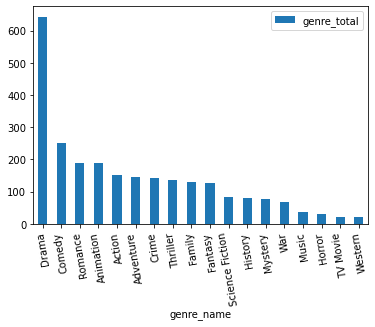

In [136]:
ax = top_genres_total.plot.bar(x='genre_name', y='genre_total', rot=100)

In [134]:
top_genres_total = top_genres_total.sort_values(by='genre_total',ascending=False).head(20)

In [139]:
top_genres_top_20 = most_popular.sort_values(by='vote_average',ascending=False).head(30)
top_genres_top_20

,id,original_title,popularity,release_date,title,vote_average,vote_count,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6
34,315162,Puss in Boots: The Last Wish,2158.063,2022-12-07,Puss in Boots: The Last Wish,8.4,4358,16,12,35,10751,0,0
98,299536,Avengers: Infinity War,287.651,2018-04-25,Avengers: Infinity War,8.3,26449,12,28,878,0,0,0
86,635302,劇場版「鬼滅の刃」無限列車編,384.471,2020-10-16,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,8.3,2970,16,28,12,14,53,0
73,361743,Top Gun: Maverick,372.213,2022-05-24,Top Gun: Maverick,8.3,6244,28,18,0,0,0,0
81,555604,Guillermo del Toro's Pinocchio,364.579,2022-11-09,Guillermo del Toro's Pinocchio,8.3,1983,16,14,18,10402,0,0
123,810693,劇場版 呪術廻戦 0,298.731,2021-12-24,Jujutsu Kaisen 0,8.2,836,16,28,14,0,0,0
338,545611,Everything Everywhere All at Once,217.894,2022-03-24,Everything Everywhere All at Once,8.0,3416,28,12,878,0,0,0
311,785084,The Whale,628.700,2022-12-09,The Whale,8.0,846,18,0,0,0,0,0
300,634649,Spider-Man: No Way Home,394.977,2021-12-15,Spider-Man: No Way Home,8.0,16890,28,12,878,0,0,0
362,573171,Huevitos Congelados,330.898,2022-12-14,A Frozen Rooster,8.0,242,16,12,35,10751,0,0


In [ ]:
Action          28
Adventure       12
Animation       16
Comedy          35
Crime           80
Documentary     99
Drama           18
Family          10751
Fantasy         14
History         36
Horror          27
Music           10402
Mystery         9648
Romance         10749
Science Fiction 878
TV Movie        10770
Thriller        53
War             10752
Western         37